In [32]:
import numpy as np
from scipy import sparse
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [33]:
train_df = pd.read_csv("../data/train.csv")
valid_df = pd.read_csv("../data/valid.csv")
test_df = pd.read_csv("../data/test.csv")

y_train = train_df["toxic"]
y_valid = valid_df["toxic"]
y_test = test_df["toxic"]

HÀM ĐÁNH GIÁ MÔ HÌNH

In [34]:
def evaluate_model(model_name, model, x_test, y_test):
    """Đánh giá mô hình sau khi train xong"""
    y_pred = model.predict(x_test)

    print(f"\n=================  {model_name} =================")
    print(" Accuracy:", accuracy_score(y_test, y_pred))
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Non-toxic", "Toxic"]))

    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['non-toxic', 'toxic'])
    disp.plot(cmap=plt.cm.Blues)

    plt.title(f"Naive Bayes with {model_name}")
    plt.show()

HÀM TRAIN VÀ ĐÁNH GIÁ SVM

In [35]:
def train_and_evaluate(model_name, x_train, y_train, x_valid, y_valid, x_test, y_test):
    # Khởi tạo mô hình SVM tuyến tính
    nb = MultinomialNB()

    # Train mô hình
    nb.fit(x_train, y_train)

    # Đánh giá trên tập validation
    y_valid_pred = nb.predict(x_valid)
    valid_acc = accuracy_score(y_valid, y_valid_pred)
    print(f" Validation Accuracy ({model_name}): {valid_acc:.4f}")

    # Đánh giá chi tiết trên tập test
    evaluate_model(model_name, nb, x_test, y_test)

BAG OF WORDS


Training with Bag of Words
 Validation Accuracy (Bag of Words): 0.8611

=================  Bag of Words =================
 Accuracy: 0.8715986394557823

 Classification Report:
              precision    recall  f1-score   support

   Non-toxic       0.92      0.92      0.92      9409
       Toxic       0.68      0.69      0.68      2351

    accuracy                           0.87     11760
   macro avg       0.80      0.80      0.80     11760
weighted avg       0.87      0.87      0.87     11760



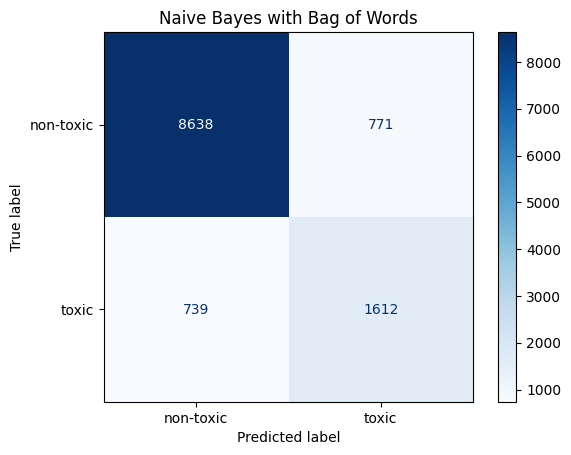

In [36]:
print("\n==============================")
print("Training with Bag of Words")
print("==============================")

x_train = sparse.load_npz("../embedded/bow/train.npz")
x_valid = sparse.load_npz("../embedded/bow/valid.npz")
x_test  = sparse.load_npz("../embedded/bow/test.npz")

train_and_evaluate("Bag of Words", x_train, y_train, x_valid, y_valid, x_test, y_test)

TF-IDF


Training with TF-IDF
 Validation Accuracy (TF-IDF): 0.8505

=================  TF-IDF =================
 Accuracy: 0.8505952380952381

 Classification Report:
              precision    recall  f1-score   support

   Non-toxic       0.85      0.99      0.91      9409
       Toxic       0.88      0.29      0.44      2351

    accuracy                           0.85     11760
   macro avg       0.86      0.64      0.68     11760
weighted avg       0.85      0.85      0.82     11760



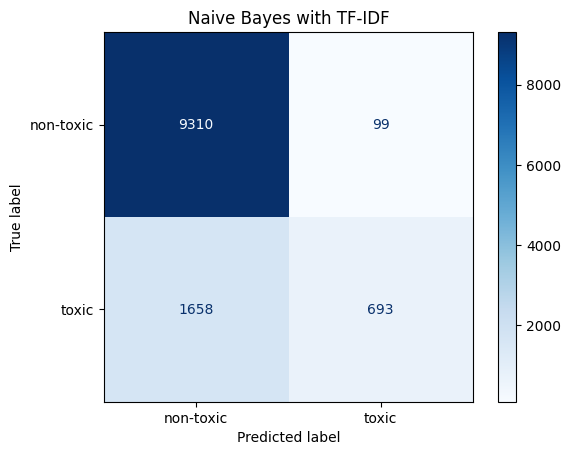

In [37]:
print("\n==============================")
print("Training with TF-IDF")
print("==============================")

x_train = sparse.load_npz("../embedded/tfidf/train.npz")
x_valid = sparse.load_npz("../embedded/tfidf/valid.npz")
x_test  = sparse.load_npz("../embedded/tfidf/test.npz")

train_and_evaluate("TF-IDF", x_train, y_train, x_valid, y_valid, x_test, y_test)